# Boston Housing Price Prediction 
Data from: https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv 

In [169]:
import pandas as pd

df = pd.read_csv('boston_housing_prices.csv')

print(df.head())
print(df.info())
print(df.describe().T)
print(df.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-nu

<bound method DataFrame.corr of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24

<Axes: >

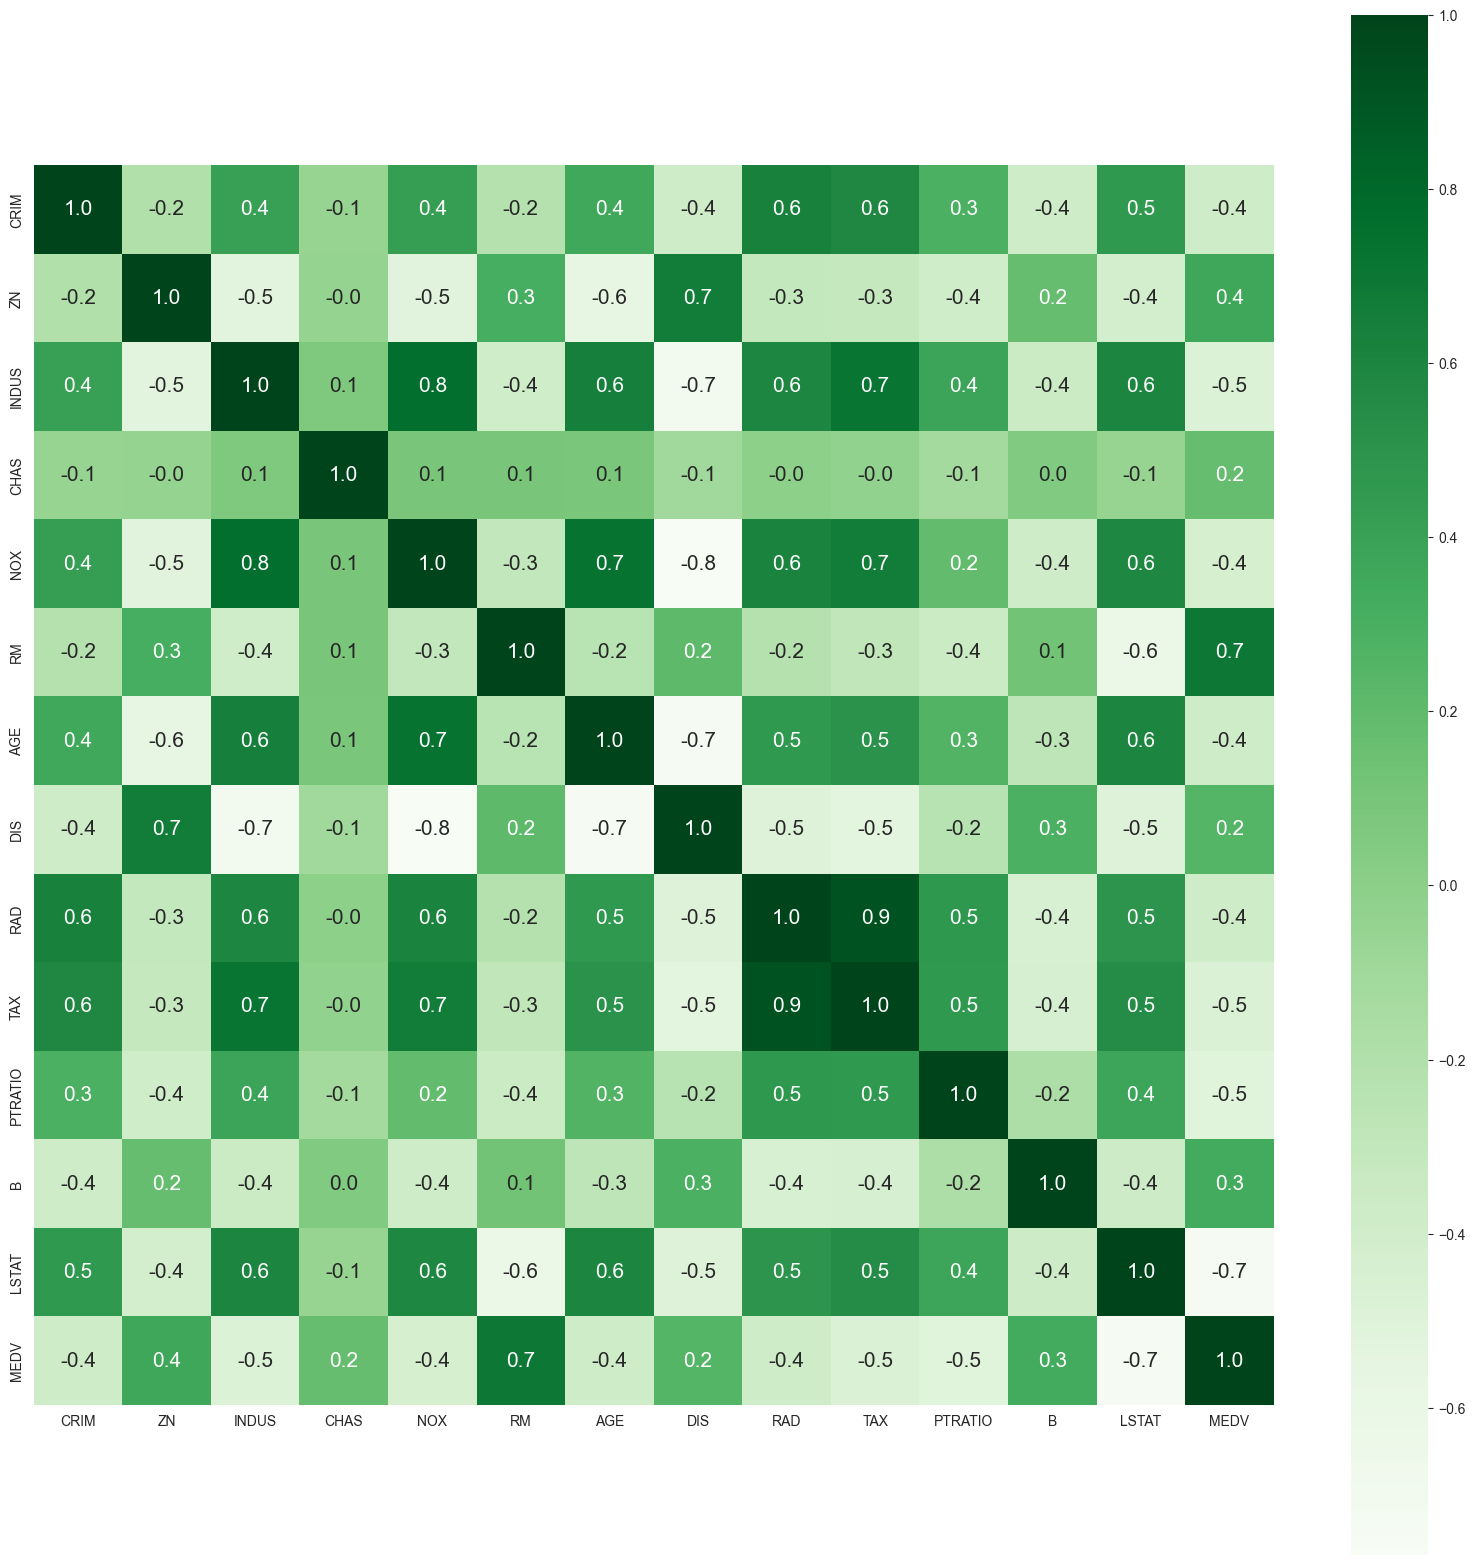

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.corr)

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [199]:
import math
from plotly.subplots import make_subplots
import plotly.graph_objects as go

total_items = len(df.columns)
items_per_row = 3
total_rows = math.ceil(total_items / items_per_row)

import plotly.io as pio
pio.renderers.default = "notebook_connected"

fig = make_subplots(rows=total_rows, cols=items_per_row)

cur_row = 1
cur_col = 1

for index, column in enumerate(df.columns):
    fig.add_trace(go.Box(y=df[column], name=column), row=cur_row, col=cur_col)

    if cur_col % items_per_row == 0:
        cur_col = 1
        cur_row = cur_row + 1
    else:
        cur_col = cur_col + 1


fig.update_layout(height=1000, width=550,  showlegend=False)
fig.show()

In [197]:
total_items = len(df.columns)
items_per_row = 3
total_rows = math.ceil(total_items / items_per_row)

fig = make_subplots(rows=total_rows, cols=items_per_row)

cur_row = 1
cur_col = 1

for index, column in enumerate(df.columns):
    fig.add_trace(go.Histogram(x=df[column], name=column), row=cur_row, col=cur_col)

    if cur_col % items_per_row == 0:
        cur_col = 1
        cur_row = cur_row + 1
    else:
        cur_col = cur_col + 1


fig.update_layout(height=1000, width=550,  showlegend=False)
fig.show()

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# scaler = StandardScaler()
scaler = MinMaxScaler()
train_x_s = scaler.fit_transform(X_train)
test_x_s = scaler.transform(X_train)
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train -= mean
X_train /= std

X_test -= mean
X_test /= std

(404, 13) (102, 13) (404,) (102,)


In [173]:
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(layers.Input((13, )))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(layers.Dropout(0.4))  # without dropping out, it will overfit
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
# model.add(Dense(16, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=256, validation_split=0.1)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 608.9730 - mae: 23.0632 - val_loss: 654.5624 - val_mae: 24.0561
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 571.2195 - mae: 22.3342 - val_loss: 624.7703 - val_mae: 23.4467
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 547.0860 - mae: 21.6509 - val_loss: 595.8634 - val_mae: 22.8368
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 515.1378 - mae: 20.8545 - val_loss: 567.3902 - val_mae: 22.2190
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 485.5451 - mae: 20.2330 - val_loss: 538.8638 - val_mae: 21.5783
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 461.7667 - mae: 19.6209 - val_loss: 509.4715 - val_mae: 20.8925
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 418.6245 - mae: 18.5107 - val_loss: 478.6873 - val_mae: 20.1443
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 393.1418 - mae: 17.8050 - val_loss: 446.7979 - val_mae: 19.3351
Epoch 9/200
2/2 ━━━━━━━━

In [198]:
# plot loss
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                           name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                           name='Test'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

fig.show()

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [175]:
# plot mean absolute error
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['mae'],
                           name='Train'))

fig.add_trace(go.Scattergl(y=history.history['val_mae'],
                           name='Test'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Mean Absolute Error')

fig.show()

In [176]:
# evaluate the model
error = model.evaluate(X_train, y_train, verbose=0)
print(dict(zip(model.metrics_names, error)))
error = model.evaluate(X_test, y_test, verbose=0)
print(dict(zip(model.metrics_names, error)))

{'loss': 11.330300331115723, 'compile_metrics': 2.4387142658233643}
{'loss': 14.729086875915527, 'compile_metrics': 2.8983285427093506}


In [178]:
from sklearn.metrics import r2_score

yhat = model.predict(X_train)
r2 = r2_score(y_train, yhat)
print(r2)

yhat = model.predict(X_test)
r2 = r2_score(y_test, yhat)
print(r2)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step
0.8575858852656775
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step
0.8512316309014772


## Optimization 
- Tried different scaler
- Added/removed different layers
- Changed the number of cells per layer
- Changed dropout position and ratio
- Increased number of epochs